In [78]:
import pandas as pd 
import yfinance as yf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = yf.download("SPY", start="2015-01-01", end="2023-12-31", interval="1d")

C:\Users\qevan\AppData\Local\Temp\ipykernel_24860\669196923.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY", start="2015-01-01", end="2023-12-31", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Downloading the data 
os.makedirs("data", exist_ok=True)
data.to_csv("data/spy_data.csv")

Cleaning and preprocessing

In [83]:
df = pd.read_csv("data/spy_data.csv")
df= df.drop([0,1])
df = df.rename(columns={"Price": "Date"})
df["Date"] = pd.to_datetime(df["Date"])

for col in df.select_dtypes(include="object").columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head(10)

,Date,Close,High,Low,Open,Volume
2,2015-01-02,171.093704,172.301356,170.052634,171.884928,121465900
3,2015-01-05,168.003769,170.210833,167.695616,170.044264,169632600
4,2015-01-06,166.421402,168.836681,165.621854,168.311977,209151400
5,2015-01-07,168.495209,168.836683,167.304230,167.753967,125346700
6,2015-01-08,171.485123,171.701673,169.894377,169.911025,147217800
7,2015-01-09,170.110916,171.918213,169.494598,171.901552,158567300
8,2015-01-12,168.778366,170.402446,168.170384,170.244202,144396100
9,2015-01-13,168.303650,171.135357,166.996059,170.002672,214553300
10,2015-01-14,167.287552,167.487442,165.380316,166.279790,192991100
11,2015-01-15,165.755096,168.245329,165.638497,167.928852,176613900


In [84]:
df.isna().sum() # no lack

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Feature engineering

In [85]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day_of_year
df["Day_of_week"] = df["Date"].dt.day_of_week
df["Return"] = np.log(df["Close"] / df["Close"].shift(1))
df["MA7"] = df["Close"].rolling(7, min_periods=1).mean()
df["MA30"] =df["Close"].rolling(30, min_periods=1).mean()
df["MA100"] =df["Close"].rolling(100, min_periods=1).mean()

In [52]:
df.describe()

,Date,Close,High,Low,Open,Volume,Year,Month,Day,Day_of_week,Return
count,2264,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2264.000000,2264.000000,2264.000000,2264.000000,2263.000000
mean,2019-07-01 19:15:03.180211712,286.571157,288.141613,284.773801,286.521333,9.077790e+07,2018.996908,6.546378,183.820671,2.026502,0.000442
min,2015-01-02 00:00:00,155.438843,156.492901,153.333352,154.996817,2.027000e+07,2015.000000,1.000000,2.000000,0.000000,-0.115887
25%,2017-04-02 06:00:00,205.661732,206.322278,205.046103,205.887525,6.189328e+07,2017.000000,4.000000,93.000000,1.000000,-0.003800
50%,2019-07-02 12:00:00,261.528275,262.676267,260.052970,261.348448,7.888170e+07,2019.000000,7.000000,184.000000,2.000000,0.000555
75%,2021-09-29 06:00:00,380.329308,383.162223,377.332225,380.204695,1.050537e+08,2021.000000,10.000000,275.000000,3.000000,0.005923
max,2023-12-29 00:00:00,466.564545,467.406263,466.143686,466.750511,5.072443e+08,2023.000000,12.000000,366.000000,4.000000,0.086731
std,NaN,91.756129,92.339497,91.093634,91.729193,4.561883e+07,2.580989,3.424918,104.650991,1.397936,0.011439


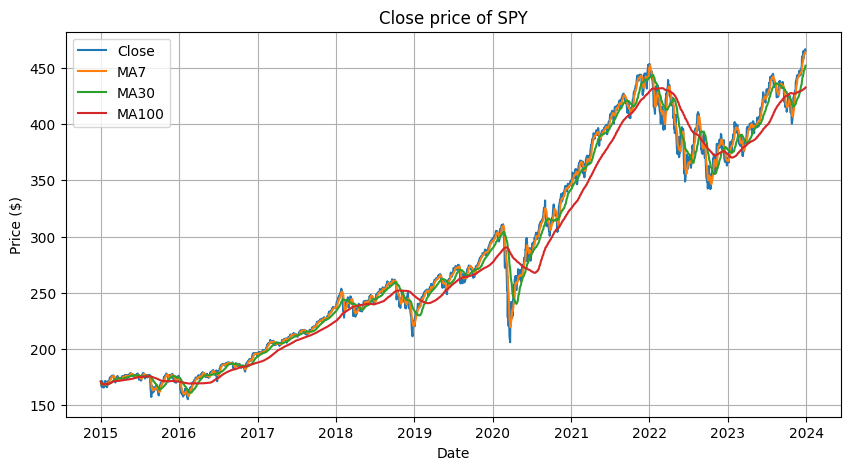

In [86]:
plt.figure(figsize=(10,5))
plt.grid()
plt.title("Close price of SPY")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.plot(df["Date"], df["Close"], label = "Close")
plt.plot(df["Date"], df["MA7"], label = "MA7")
plt.plot(df["Date"], df["MA30"], label = "MA30")
plt.plot(df["Date"], df["MA100"], label = "MA100")
plt.legend()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   2.,   3.,   2.,   0.,   3.,   3.,   6.,   3.,  11.,   5.,
         10.,  10.,  16.,  17.,  27.,  27.,  47.,  48.,  60., 106., 105.,
        187., 269., 295., 251., 163., 135., 119.,  81.,  71.,  61.,  33.,
         22.,  11.,   9.,  13.,   6.,   1.,   6.,   2.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   1.,   1.,   2.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-0.11588663, -0.11386045, -0.11183427, -0.1098081 , -0.10778192,
        -0.10575575, -0.10372957, -0.10170339, -0.09967722, -0.09765104,
        -0.09562486, -0.09359869, -0.09157251, -0.08954633, -0.08752016,
        -0.08549398, -0.0834678 , -0.08144163, -0.07941545, -0.07738928,
        -0.0753631 , -0.07

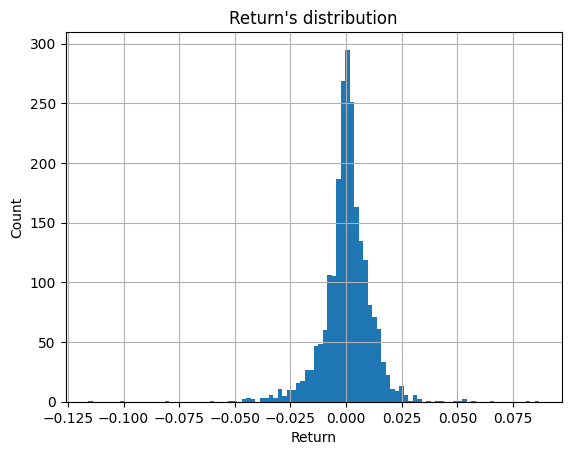

In [87]:
plt.grid()
plt.xlabel("Return")
plt.ylabel("Count")
plt.title("Return's distribution")
plt.hist(df["Return"], bins=100)


In [88]:
df["signal"] = 0
df.loc[df["MA30"] > df["MA100"], "signal"] = 1
df.loc[df["MA30"] < df["MA100"], "signal"] = -1

,Date,Close,High,Low,Open,Volume,Year,Month,Day,Day_of_week,Return,MA7,MA30,MA100,signal
2,2015-01-02,171.093704,172.301356,170.052634,171.884928,121465900,2015,1,2,4,NaN,171.093704,171.093704,171.093704,0
3,2015-01-05,168.003769,170.210833,167.695616,170.044264,169632600,2015,1,5,0,-0.018225,169.548737,169.548737,169.548737,0
4,2015-01-06,166.421402,168.836681,165.621854,168.311977,209151400,2015,1,6,1,-0.009463,168.506292,168.506292,168.506292,0
5,2015-01-07,168.495209,168.836683,167.304230,167.753967,125346700,2015,1,7,2,0.012384,168.503521,168.503521,168.503521,0
6,2015-01-08,171.485123,171.701673,169.894377,169.911025,147217800,2015,1,8,3,0.017589,169.099841,169.099841,169.099841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,2023-12-22,463.589111,465.282375,461.680550,463.794642,67160400,2023,12,356,4,0.002008,461.534324,447.595692,431.346142,1
2262,2023-12-26,465.546661,466.456900,463.921918,464.000235,55387000,2023,12,360,1,0.004214,462.309771,448.796931,431.641666,1
2263,2023-12-27,466.388397,466.535205,464.802813,465.341118,68000300,2023,12,361,2,0.001806,463.313703,450.039873,431.965326,1
2264,2023-12-28,466.564545,467.406263,466.143686,466.750511,77158100,2023,12,362,3,0.000378,463.973659,451.011192,432.252863,1
